<img src=images/MIT_logo.jpg width=150 align=right />

# DESIGNING AND BUILDING AI PRODUCTS AND SERVICES

# Artificial Intelligence Technology Fundamentals — Machine Learning

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression

## Simple linear regression
$y = b + ax$

We want to find an optimal set of values for $a$ and $b$ that minimize the residuals.

[11.10083837] [[1.84171788]]


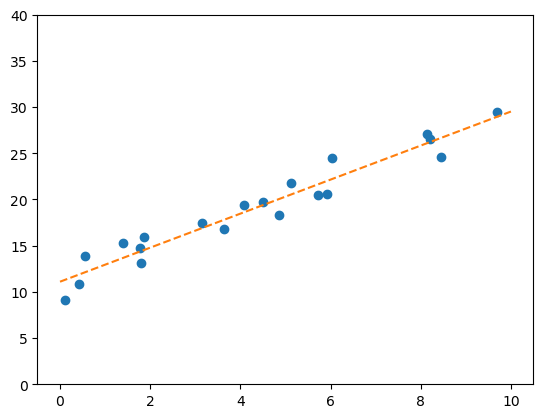

In [2]:
x = np.random.uniform(0, 10, 20)
y = 10 + x * 2 + np.random.randn(20) * 2
x, y = x.reshape(-1, 1), y.reshape(-1, 1)

lr = LinearRegression()
lr.fit(x, y)

print(lr.intercept_, lr.coef_)

plt.scatter(x, y)

x_ = np.array([[0], [10]])
plt.plot(x_, lr.predict(x_), c='tab:orange', ls='--')
#plt.plot(x_, 25 - x_, c='tab:green', ls='--')
plt.ylim((0, 40))

plt.show()

#### The line of best fit has a set of parameters that minimize the Mean Squared Error.

$$ \text{MSE} = \frac{\sum_{i=1}^{n}(\hat{y}_i - {y}_i)^2}{n}$$

### Gradient descent

In [3]:
n = 20
x = np.random.uniform(0, 10, n)
y = 0 + x * 2 + np.random.randn(n) * 2
x, y = x.reshape(-1, 1), y.reshape(-1, 1)

coef = 0

def predict(x, coef):
    return x * coef

def mse(y_pred, y):
    return np.mean((y_pred - y)**2) / 2

y_pred = predict(x, coef)
#print(y_pred)

mse(y_pred, y)

88.68967835268153

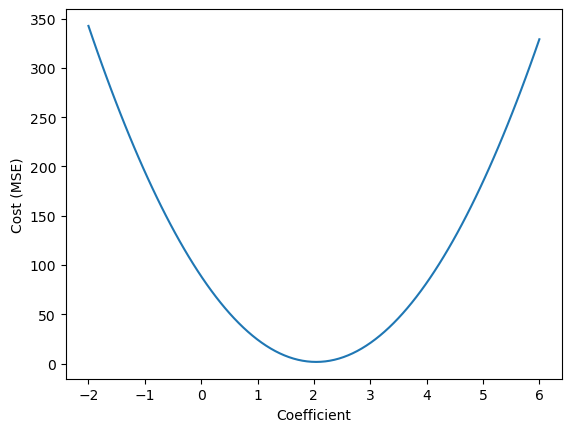

In [4]:
coefs = np.linspace(-2, 6, 100)

cost = []
for c in coefs:
    y_pred = predict(x, c)
    cost.append(mse(y_pred, y))

plt.plot(coefs, cost)
plt.xlabel('Coefficient')
plt.ylabel('Cost (MSE)')

plt.show()

In [5]:
def gradient(x, y, y_pred):
    return np.mean((y_pred - y) * x)

def update(grad, rate):
    return rate * grad

def fit(x, y, coef=0, n_iter=100, rate=0.01):
    for i in range(n_iter):
        #print(coef)
        y_pred = predict(x, coef)
        #print(mse(y_pred, y))
        grad = gradient(x, y, y_pred)
        #print(grad)
        coef -= update(grad, rate)
        
    return coef
        
fit(x, y)

2.040506755327842

In [6]:
def gradient(x, y, y_pred):
    return np.mean((y_pred - y) * x)

def update(grad, rate):
    return rate * grad

def fit(x, y, coef=0, n_iter=100, rate=0.01):
    for i in range(n_iter):
        #print(coef)
        y_pred = predict(x, coef)
        #print(mse(y_pred, y))
        grad = gradient(x, y, y_pred)
        #print(grad)
        coef -= update(grad, rate)
        
    return coef
        
fit(x, y)

2.040506755327842

In [7]:
n = 20
x = np.random.uniform(0, 10, n)
y = -5 + x * 2 + np.random.randn(n) * 2
x, y = x.reshape(-1, 1), y.reshape(-1, 1)

x = np.concatenate([np.ones(n).reshape(-1, 1), x], axis=1)
x

array([[1.        , 9.95164833],
       [1.        , 8.55336465],
       [1.        , 3.84742648],
       [1.        , 7.80214768],
       [1.        , 1.3624406 ],
       [1.        , 3.67709833],
       [1.        , 5.34926367],
       [1.        , 4.8862533 ],
       [1.        , 5.8493236 ],
       [1.        , 8.91976955],
       [1.        , 5.92931501],
       [1.        , 5.01068101],
       [1.        , 8.95193819],
       [1.        , 0.94998961],
       [1.        , 9.94499744],
       [1.        , 4.3381596 ],
       [1.        , 6.56584177],
       [1.        , 4.10762415],
       [1.        , 0.0175075 ],
       [1.        , 9.85848784]])

In [8]:
def predict(x, coef):
    # Because 1*coef[0] + x[1]*coef[1] + ... +  x[n]*coef[n] is the dot product coef · x
    return np.dot(x, coef).reshape(-1, 1)

def gradient(x, y, y_pred):
    return np.mean((y_pred - y) * x, axis=0)

coef = fit(x, y, coef=np.zeros(2), n_iter=10000)
coef

array([-4.48286701,  1.91787541])

In [9]:
lr = LinearRegression().fit(x[:, 1:], y)
print(lr.intercept_, lr.coef_)

[-4.48286702] [[1.91787541]]


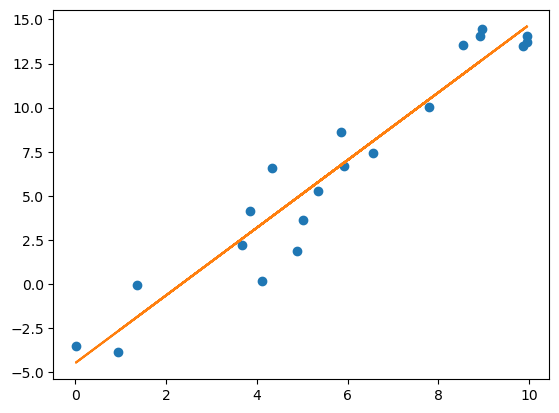

In [10]:
plt.scatter(x[:, 1], y)
plt.plot(x[:, 1], predict(x, coef), 'tab:orange')

plt.show()